In [42]:
from numpy import random, concatenate, full
from collections import Counter

def simulate_hand():
    
    # Roll 1: 5 dice
    hand = random.randint(1, 7, size=5)
    
    for _ in range(2): # Two opportunities to re-roll
        if len(set(hand)) == 1: 
            #print("YAHTZEE!!!")
            break # Already a Yahtzee!
            
        # Strategy: Find the most common die value
        counts = Counter(hand)
        keep_val, keep_count = counts.most_common(1)[0]
        
        # Roll the dice we didn't keep
        num_to_roll = 5 - keep_count
        new_dice = random.randint(1, 7, size=num_to_roll)
        
        # Update hand: Kept dice + New dice
        hand = concatenate([full(keep_count, keep_val), new_dice])
        
    return len(set(hand)) == 1 # Returns True if all 5 dice are the same

# Run simulation
N = 1_000_000
yahtzees = sum(simulate_hand() for _ in range(N))

print(f"Yahtzees with re-rolls: {yahtzees}")
print(f"Win Probability: {yahtzees/N:.4%}")

Yahtzees with re-rolls: 45826
Win Probability: 4.5826%


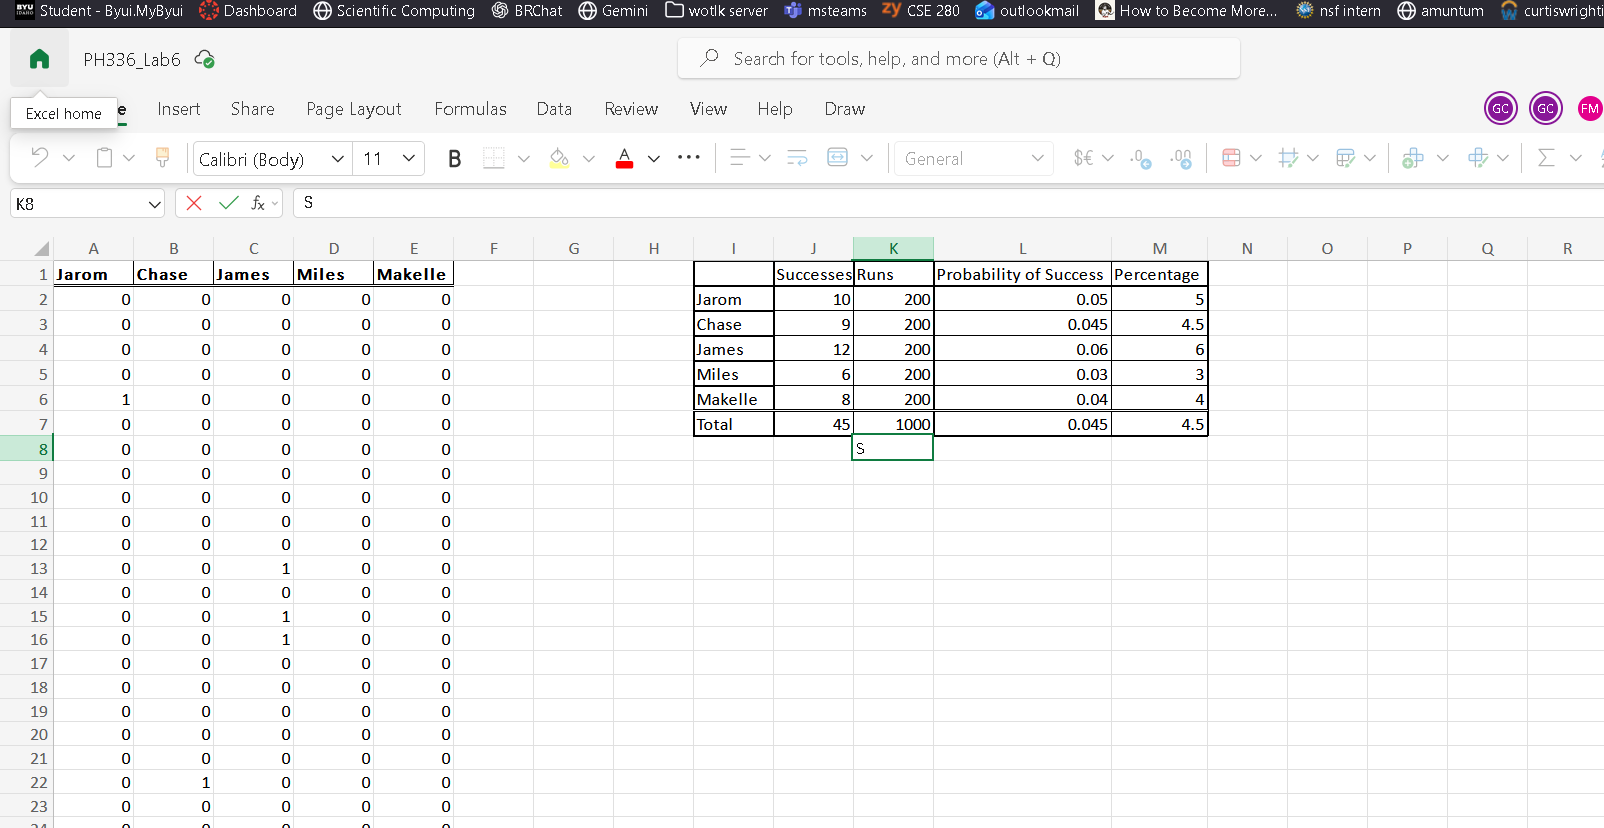